In [1]:
import dagshub
dagshub.init(repo_owner='dakshvandanarathi', repo_name='YT-Sentiment-Analyser', mlflow=True)

import mlflow

Accessing as dakshvandanarathi

Initialized MLflow to track repo "dakshvandanarathi/YT-Sentiment-Analyser"

Repository dakshvandanarathi/YT-Sentiment-Analyser initialized!

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/preprocessed_data.csv')
df.head()

,comment,category,word_count,char_count,avg_word_length
0,family mormon never tried explain still stare ...,1,26,199,7.370370
1,buddhism much lot compatible christianity espe...,1,140,990,7.021277
2,seriously say thing first get complex explain ...,-1,46,275,5.851064
3,learned want teach different focus goal not wr...,0,15,101,6.312500
4,benefit may want read living buddha living chr...,1,68,478,6.927536


In [4]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X = df.drop('category', axis=1)
y = df['category']

In [6]:
# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['category'])

In [7]:
# Step 2: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)

In [8]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [9]:
# Fit and transform the training data and transform the test data
X_train_bow = vectorizer.fit_transform(X_train['comment'])
X_test_bow = vectorizer.transform(X_test['comment'])

# Convert the sparse matrix to DataFrame
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
X_test_bow_df = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Combine the BOW features with the original columns for training data
X_train_combined = pd.concat([X_train, X_train_bow_df], axis=1)
X_test_combined = pd.concat([X_test, X_test_bow_df], axis=1)

# Drop the original 'comment' column
X_train_combined.drop('comment', axis=1, inplace=True)
X_test_combined.drop('comment', axis=1, inplace=True)

In [10]:
X_train

,comment,word_count,char_count,avg_word_length
0,bjp done something one advertising marketing w...,57,406,7.000000
1,bjp getting first time hindu voter cong but ir...,16,101,5.941176
2,not convince every random joe asking evidence ...,51,346,6.653846
3,many hard core bhakts hoping pakistan would ki...,12,77,5.923077
4,pino insegno avuto sfortuna dover guardare per...,28,182,6.275862
...,...,...,...,...
29324,tell political motivation behind sikh gurudwar...,8,64,7.111111
29325,wonder kicked insubordination bjp,4,33,6.600000
29326,appreciate effort bro but concrete step pakist...,17,128,7.111111
29327,occupy wall street level stupidity,5,35,5.833333


In [11]:
X_train_bow_df

,000,100,1000,101,103,104,105,108,10k,10th,...,zindabad,zindagi,zing,zomato,zombie,zonal,zone,zoom,zor,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train_combined

,word_count,char_count,avg_word_length,000,100,1000,101,103,104,105,...,zindabad,zindagi,zing,zomato,zombie,zonal,zone,zoom,zor,zuckerberg
0,57,406,7.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,101,5.941176,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51,346,6.653846,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,77,5.923077,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,182,6.275862,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29324,8,64,7.111111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29325,4,33,6.600000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29326,17,128,7.111111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29327,5,35,5.833333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train

,category
0,-1
1,1
2,-1
3,1
4,0
...,...
29324,-1
29325,0
29326,1
29327,-1


In [14]:
# Set or create an experiment
mlflow.set_experiment("Exp 1 - RF Baseline")

<Experiment: artifact_location='mlflow-artifacts:/fe04ba670bf84c36903f7aa05c6a765e', creation_time=1729414237207, experiment_id='1', last_update_time=1729414237207, lifecycle_stage='active', name='Exp 1 - RF Baseline', tags={}>

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/20 15:33:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). I

Accuracy: 0.6054820673666985


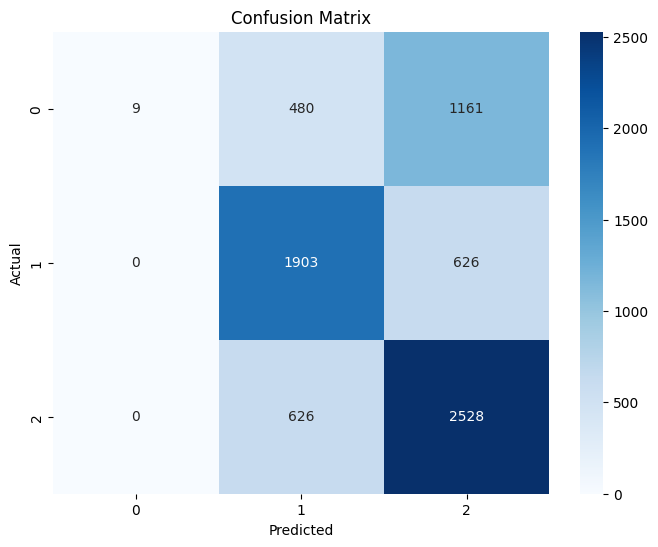

In [15]:
# Step 3: Define and train a Random Forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Add a description
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    # Log Random Forest parameters
    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train_combined, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_combined)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log the confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("/content/confusion_matrix.png")

    # Log the Random Forest model and vectorizer
    signature = mlflow.models.infer_signature(X_test_combined, model.predict(X_test_combined))
    mlflow.sklearn.log_model(model, "random_forest_model", signature = signature)
    signature = mlflow.models.infer_signature(X_test['comment'], X_test_bow)
    mlflow.sklearn.log_model(vectorizer, "vectorizer", signature = signature)

    # Log the dataset
    X_train['target'] = y_train
    dataset = mlflow.data.from_pandas(X_train, targets="target")
    mlflow.log_input(dataset, context="training")
    X_test['target'] = y_test
    dataset = mlflow.data.from_pandas(X_test, targets="target")
    mlflow.log_input(dataset, context="validation")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.01      1650
           0       0.63      0.75      0.69      2529
           1       0.59      0.80      0.68      3154

    accuracy                           0.61      7333
   macro avg       0.74      0.52      0.46      7333
weighted avg       0.70      0.61      0.53      7333

